In [20]:
#Genera libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

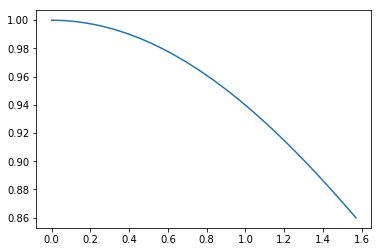

In [26]:
#Q1
x = np.arange(0,np.pi/2,0.0001) #phi array
dx = abs(b - a)

N = len(x)
h = (a-b)/N

g = np.linspace(0,np.pi/2, 1000) #alpha array
o =[] #empty list where ill store all the integral values

for e in g: #calculating integral over all vales of alpha
    k = np.sin(e/2)
    f =  2/np.pi*np.sqrt(1-((k*np.sin(x))*(k*np.sin(x)))) 
    I = 0.0
    for i in range(1, N-1,2):
        I = float(I + (h / 3.0)*(f[i-1] + 4.0*f[i] + f[i+1]))
    if (N%2)==0:
        I = I + h * (5.0*f[-1] + 8.0*f[-2] - f[N-2])/12.0 
        
    o.append(-1* float(I)) 
    
    #using this method I was getting a - sign wrong in final integration everytime. hence i have multiplied a -1 to every entry

plt.plot(g,o) #plot

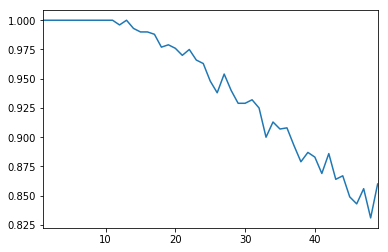

In [12]:
#Q2
import random
import pandas as pd
# pandas was imported for plotting only

max_ex = 1000 # max iteration

start_step = 1
stop_step = 50

res_arr = []

for n_step in range(start_step, stop_step):
    
    trap = 0 # trapped counter
    no_trap = 0
    
    for exp in range(0,max_ex):
        
        n_t_b = True # conditional
        pos = 0 # initial position
        
        for step in range(n_step):
            pos = pos+[-1,1][random.randint(0,1)] #random walk
            
            if(pos==10): # trap
                trap = trap + 1 # trapped
                n_t_b = False
                break
                
        if(n_t_b):
            no_trap = no_trap + 1 # not trapped
            
    res_arr.append(no_trap/max_ex) #normalising the prob

ser = pd.Series(res_arr)
ser.index = range(start_step, stop_step)
ser.plot()

No. of people when at least 2 will have same bday is 23


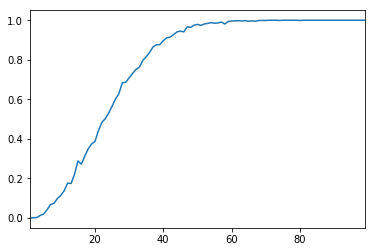

In [28]:
#Q3
import random
from scipy.stats import mode
import pandas as pd

res_arr = []

prob = 0.5 # prob with 50%

max_ex = 1000 #max iteration


start = 1 # has to be atleast 1 person
end = 100 # this can be changed accrodingly, 100 was arbitarily chosen


for x in range(start, end):
    
    fulfill = 0 # counters 
    not_fulfill = 0
    
    for no_ex in range(0,max_ex):
        arr = [random.randint(0,364) for _ in range(0,x)] #random bday
        
        max_elem = mode(arr)                     #taking mode ie number of same event
        max_count = max_elem.count[0]
        
        if(max_count>1):                         #if mode is more than 1, the bday is repeated and counter for repetion goes +1
            fulfill = fulfill+1                 
        else:
            not_fulfill = not_fulfill+1          # if bday isnt repeated the counter for not repeating goes +1
            
    res_arr.append(fulfill/max_ex)              # normalising

for x in range(len(res_arr)):
    if(res_arr[x]>prob):     
        
        # when the 50 % prob is achieved
        
        print("No. of people when at least 2 will have same bday is",range(start,end)[x])
        break
    
ser = pd.Series(res_arr)
ser.index = range(start,end)
ser.plot()

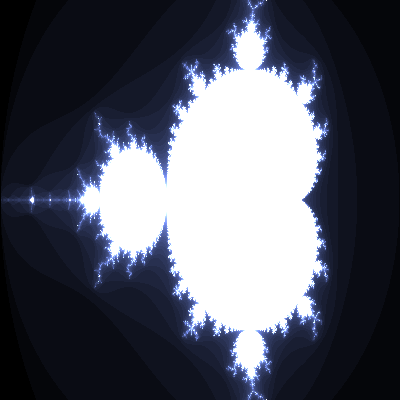

In [8]:
#Q4
from PIL import Image 
  
# Boundary conditions
x1 = -2.0
x2 = 1.0
y1 = -1.0
y2 = 1.0
  
# max iterations allowed 
maxIt = 80
  
# image size 
lenx = 400
leny = 400

image = Image.new("RGB", (lenx, leny)) 
  
for y in range(leny): 
    for x in range(lenx): 
        
        zy = y * (y2 - y1) / (leny - 1)  + y1  #component evolution
        zx = x * (x2 - x1) / (lenx - 1)  + x1 
        
        z = complex(zx,zy)
        
        c = z
        
        for i in range(maxIt+1): #including max iteration
            if abs(z) > 2.0:   #divergence condition
                break
            z = z * z + c 
            
        image.putpixel((x, y), (i *5, i * 6, i* 10))  #coloring conditions 
        
image

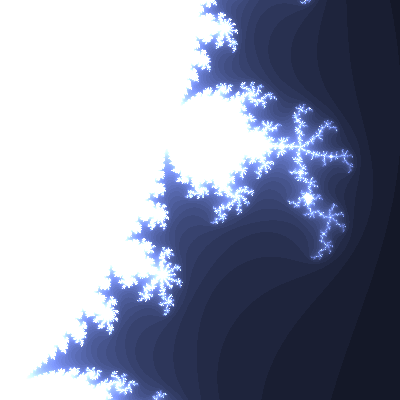

In [22]:
#Zoomed plot
from PIL import Image 

# New Boundary conditions
x1 = 0.25 
x2 = 0.5
y1 = 0.25
y2 = 0.5
  
# max iterations allowed 
itm = 80
  
# image size 
lenx = 400
leny = 400

image2 = Image.new("RGB", (lenx, leny)) 
  
for y in range(leny): 
    for x in range(lenx): 
        
        zy = y * (y2 - y1) / (leny - 1)  + y1 # component evolution
        zx = x * (x2 - x1) / (lenx - 1)  + x1 
        
        z = complex(zx,zy)
        c = z
        
        for i in range(itm+1):  # including max iteration
            if abs(z) > 2.0:  # divergence condition
                break
            z = z * z + c 
            
        image2.putpixel((x, y), (i*5, i*6, i*10))  #coloring condition
        
image2

Above we can very clearly observe the fractals